# s02: Data Analysis

This notebook goes through some minimal examples of the kinds of things we might want to do using data science approaches. 

In particular, it briefly introduces analyzing data for the purposes of:
- `Prediction`: to analyze available data in order to be able to make predictions about future data
- `Classification`: to group and label data in useful and meaningful ways
- `Knowledge Discovery`: to seek to discover new knowledge about the data and the phenomena they represent

These are not the only tasks we might have in data science, but these examples do capture some of the key tasks when doing data science. 

These examples will already start using packages in the Python data-science toolkit, and some simple algorithms to demonstrate example cases. 

The goal here is show, in code, the outline of the kinds of things data science is interested in doing. You don't yet need to be able to follow how the code works for these examples. These tools and algorithms will be more fully described and properly introduced in future notebooks.

In [1]:
%matplotlib inline

# Import numpy and matplotlib for some quick examples
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-danger">
Task 3.1: Import the numpy package as np and create a variable with a meaningful name. The variable should hold an 1darray with number as integers from 1 to 10. (2 points)
</div>

<div class="alert alert-danger">
Task 3.2: Using numpy create a 1darray of random integers (np.random.randint). Find the min, max, and mean of the array and print them in the command line using a formatted string. (2 points)
</div>

## Prediction

<div class="alert alert-success">
Prediction is the use of current (training) data to make predictions about future observations.
</div>

### Example Problem

Let's say we wanted to predict the weight of dogs, given that we know their length. 

We could imagine, for example, in the case of a veterinary clinic, in some cases it might be easier to measure a dog with a tape measure, rather than to get it dog onto a scale, if we can then estimate the information we need.

So how do we go about making such predictions?

In [2]:
# We start with some data
lengths = [75, 50, 90, 115]    # cm's
weights = [17.5, 10, 18, 20]   # kg's

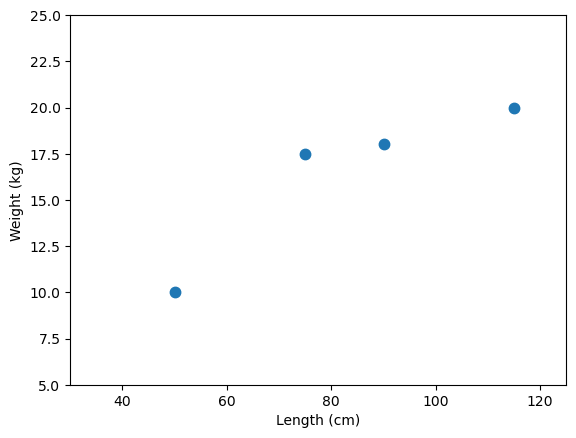

In [3]:
# Plot the data: Always visualize your data!
fig, ax = plt.subplots()
ax.plot(lengths, weights, '.', ms=15)
ax.set(xlabel='Length (cm)', ylabel='Weight (kg)',
       xlim=[30, 125], ylim=[5, 25]);

In [4]:
# Polyfit (degree=1) will fit a linear fit to the data, of the form y = ax + b
#  Once we fit this simple model to the data, we can use it to predict from new data points
a, b = np.polyfit(lengths, weights, 1)

In [5]:
# So now we can predict the weight of a new observation (a new dog)
new_length = 62
pred_weight = a * new_length + b 
print('Predicted weight for a new data point, weight is {:1.2f}.'.format(pred_weight))

Predicted weight for a new data point, weight is 13.35.


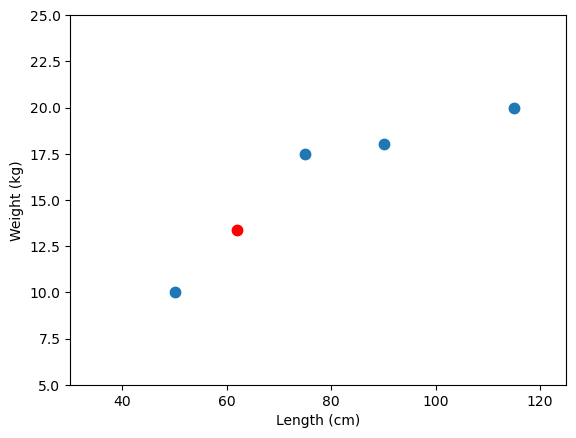

In [6]:
# We can check how our prediction fits in with the data we observed
ax.plot(new_length, pred_weight, '.r', ms=15)
fig

In [7]:
# If we also happen to now the true weight of our test data, we can check how good our prediction is
actual_weight = 14.7
error = actual_weight - pred_weight

print('The (absolute) error of our prediction is {:1.2f} kilograms.'.format(error))

The (absolute) error of our prediction is 1.35 kilograms.


How we go about making predictions gets more complicated, as we deal with large, messy data with more variables of various 'shapes'. 

Fundamentally, though, it comes down to the same process: what can we learn from a set of data, such that, given a new peice of data, we can make predictions about it (and using test data with known answers to evaluate how good our predictive models are). 
<hr>

## Classification

<div class="alert alert-success">
Classification (or clustering) is the process of trying to discover a systematic organization of data. 
</div>

### Problem

Let's now imagine our local zoologist is investigating a group of squirrels. 

She would like to know how many different species there are present in the population. However, she only has a limited set of basic data to work with.

We can try and cluster the data we have, and look for (what look like) meaningful groupings.

In this case, let's imagine we were able to weigh and measure a selection of squirrels that otherwise look about the same. 

Our task is then to analyze the data to see if there appear to be any meaningful groupings.

In [8]:
# We observe a bunch of squirrels with [height (cm), weight (grams)] pairs
data = np.array([[10., 600.], [16., 1200], [6., 800], [12., 700.], [17., 1400.],
                [8., 500.], [20., 1500.], [21., 1300.], [11., 800.], [18., 1100.]])

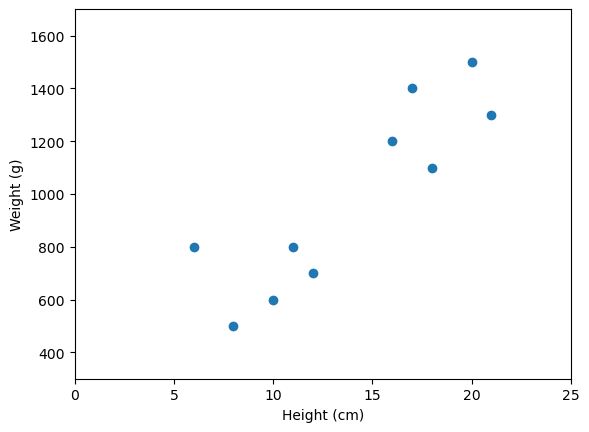

In [9]:
# Visualize our data!
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], '.', ms=12)
ax.set(xlabel='Height (cm)', ylabel='Weight (g)',
       xlim=[0, 25], ylim=[300, 1700]);

In [10]:
# Use scikit-learn to import a classification algorithm
from sklearn.cluster import KMeans

In [11]:
# Apply K-means clustering
#   We'll come back to how this algorithm works later
kmeans = KMeans(2).fit(data)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# This gives us a label each data point, as to which cluster it belongs to
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [13]:
# We can use these to split our dataset up into putative groupings
cl_1 = data[kmeans.labels_ == 0]
cl_2 = data[kmeans.labels_ == 1]

[Text(0.5, 0, 'Height (cm)'),
 Text(0, 0.5, 'Weight (g)'),
 (0.0, 25.0),
 (300.0, 1700.0)]

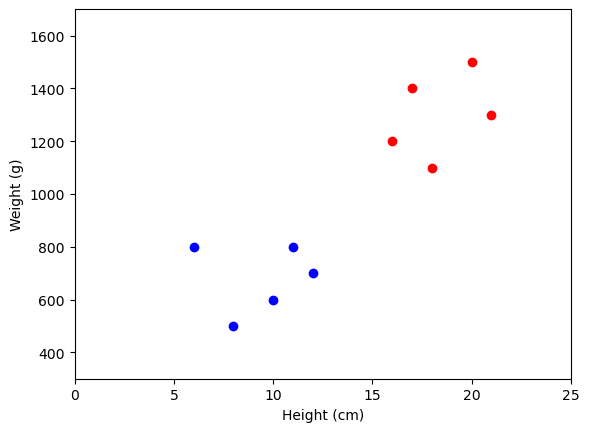

In [14]:
# And visualize the classification
fig, ax = plt.subplots()
ax.plot(cl_1[:, 0], cl_1[:, 1], '.b', ms=12)
ax.plot(cl_2[:, 0], cl_2[:, 1], '.r', ms=12)
ax.set(xlabel='Height (cm)', ylabel='Weight (g)',
       xlim=[0, 25], ylim=[300, 1700])

In the above example, we tried to see if partition the data into two groups worked well and, visually, it looks quite reasonable!

Note, however, that properly evaluating classification is difficult. That is especially true in this case, since we don't know the answer. That means this example is unsupervised - we don't know the answer, or have any labels to learn these patterns in the data.

So, in this case, the answer looks plausible, but it's hard to know if there really are two groups here. There could be more, or fewer. We'll come back to how these analyses actually work and how to evaluate what you get out of them. 

<div class="alert alert-danger">
Task 3.3: Add data for a third species of squirrels. Run the k-means algorithm again for three clusters and see how it influences your outcome. To do so, plot the new data with three clusters. (3 points)
</div>

## Knowledge Discovery

<div class="alert alert-success">
Knowledge Discovery is the attempt to learn new things about the world from data. 
</div>

Knowledge discovery is not necessarily methodologically distinct from prediction and classification. Seeking new knowledge will likely include analysis focused on classification and prediction, and other related analyses.

However, we can consider that the data science problems can have different contexts and approaches. Asking how predict one known variable from another (such as a dog's weight from it's length), or to classify data into a previously known categorization scheme (such as labeling different kinds of species) are tasks that use data science to answer previously known questions. 

Sometimes, in data analyses, we also want to explore and discover new findings and ideas from a dataset without having pre-defined questions. We might try to ask about the structure of the data, or look for new patterns we didn't know before. This is sometimes also called 'exploratory data analysis', as opposed to 'hypothesis driven' work. 

<div class="alert alert-info"> 
A great example of this is a <a href=https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w class="alert-link">study</a> from Düsseldorf, where students of a seminar were asked to analyse a dataset. 
The dataset contained the body mass index (BMI) of 1786 people, together with the number of steps each of them took on a particular day, in two files: one for men, one for women. 
Students were placed into two groups. The students in the first group were asked to consider three specific hypotheses: 
(i) that there is a statistically significant difference in the average number of steps taken by men and women, 
(ii) that there is a negative correlation between the number of steps and the BMI for women, and
(iii) that this correlation is positive for men. They were also asked if there was anything else they could conclude from the dataset. 

In the second, “hypothesis-free,” group, students were simply asked: What do you conclude from the dataset? 

Funny enough, if you would plot the data BMI vs. number of steps, the image of a gorilla emerged. It the students group with the hypothesis, 14 students did not discover the gorilla, while only 5 did. (5 to 9 in the hypothesis free group).

</div>

<br>
<img src="img/data_gorilla.png",width="250px">
<br>